<a href="https://colab.research.google.com/github/jorgenriquez/Inteligencia_artificial/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal múltiple

## Importación de las librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importación del conjunto de datos

In [3]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Codificación de datos categóricos

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Entrenamiento del modelo de regresión lineal múltiple en el conjunto de entrenamiento

In [41]:
from sklearn.linear_model import LinearRegression
lm = regressor = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Predicción de los resultados del conjunto de pruebas

In [42]:
y_pred = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [43]:
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [44]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

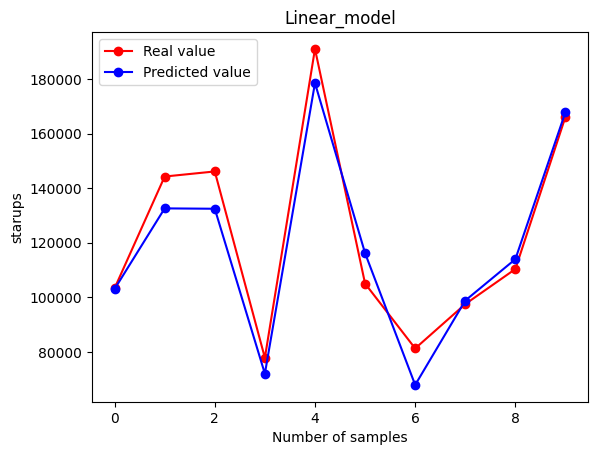

In [45]:
z = np.arange(len(y_pred))
plt.plot( z, y_test, color = "red", marker = "o", label = "Real value")
plt.plot( z, y_pred, color = "blue", marker = "o", label = "Predicted value")
plt.title("Linear_model")
plt.xlabel("Number of samples")
plt.ylabel("starups")
plt.legend(loc = "upper left")

# **Métricas de regresión**

Las métricas de regresión en aprendizaje automático ml y cada modelo de Machine Learning que la utiliza intenta resolver un problema con un objetivo diferente utilizando un conjunto de datos diferente y, por lo tanto, es importante comprender el contexto antes de elegir una métrica.

Generalmente, las respuestas a la siguiente pregunta nos ayudan a elegir la métrica apropiada:

Tipo de tarea: ¿Regresión? ¿Clasificación?
¿Objetivo de negocio?
¿Cuál es la distribución de la variable objetivo?

### Métricas de regresión en aprendizaje automático ml:


- (MSE) – Error cuadrático medio
- (RMSE) -Error cuadrático medio
- (MAE) -Error absoluto medio
- (R²) – R al cuadrado
- R cuadrado ajustado (R²)
- (MSPE) – Error de porcentaje cuadrático medio
- (MAPE) – Error porcentual absoluto medio
- (RMSLE) – Error logarítmico cuadrático medio


### **MAE, MSE, RMSE, coeficiente de determinación, R cuadrado ajustado:**

El paso esencial en cualquier modelo de aprendizaje automático es evaluar la precisión del modelo. Las métricas de error cuadrático medio, error cuadrático medio, error cuadrático medio y R cuadrado o coeficiente de determinación se utilizan para evaluar el rendimiento del modelo en el análisis de regresión.

**MAE.** El error absoluto medio representa el promedio de la diferencia absoluta entre los valores reales y previstos en el conjunto de datos. Mide el promedio de los residuos en el conjunto de datos.

\begin{equation}
M A E=\frac{1}{N} \sum_{i=1}^N\left|y_i-\hat{y}\right|
\end{equation}

Donde,
$$
\begin{aligned}
& \hat{y}-\text { predicted value of } y \\
& \bar{y}-\text { mean value of } y
\end{aligned}
$$

**MSE**. El error cuadrático medio representa el promedio de la diferencia al cuadrado entre los valores originales y predichos en el conjunto de datos. Mide la varianza de los residuos.

\begin{equation}
M S E=\frac{1}{N} \sum_{i=1}^N\left(y_i-\hat{y}\right)^2
\end{equation}

Donde,
$$
\begin{aligned}
& \hat{y}-\text { predicted value of } y \\
& \bar{y}-\text { mean value of } y
\end{aligned}
$$


**Ventaja:**
Útil si tenemos valores inesperados que nos deberían interesar. Muy alto o bajo valor que debemos prestar atención.

**Desventaja:**
Si hacemos una predicción muy mala, la cuadratura empeorará aún más el error y puede sesgar la métrica para sobreestimar la maldad del modelo. Este es un comportamiento particularmente problemático si tenemos datos ruidosos (es decir, los datos que por cualquier motivo no son del todo confiables).

Incluso un modelo “perfecto” puede tener un MSE alto en esa situación. Por lo que es difícil juzgar qué tan bien modelo está realizando.

Por otro lado, si todos los errores son pequeños, o más bien, más pequeños que 1, se siente el efecto contrario: podemos subestimar la maldad del modelo.


**RMSE**. El error cuadrático medio es la raíz cuadrada del error cuadrático medio. Mide la desviación estándar de los residuos.

\begin{equation}
R M S E=\sqrt{M S E}=\sqrt{\frac{1}{N} \sum_{i=1}^N\left(y_i-\hat{y}\right)^2}
\end{equation}

$R^2$. El coeficiente de determinación o `R cuadrado` representa la proporción de la varianza en la variable dependiente que se explica por el modelo de regresión lineal. Es una puntuación sin escala, es decir, independientemente de que los valores sean pequeños o grandes, el valor de R cuadrado será menor que uno.

\begin{equation}
R^2=1-\frac{\sum\left(y_i-\hat{y}\right)^2}{\sum\left(y_i-\bar{y}\right)^2}
\end{equation}

### **Diferencias entre estas métricas de evaluación**

- El error cuadrático medio (MSE) y el error cuadrático medio penalizan los grandes errores de predicción frente al error absoluto medio (MAE). Sin embargo, RMSE se usa ampliamente que MSE para evaluar el desempeño del modelo de regresión con otros modelos aleatorios, ya que tiene las mismas unidades que la variable dependiente (eje Y).

- MSE es una función diferenciable que facilita la realización de operaciones matemáticas en comparación con una función no diferenciable como MAE. Por lo tanto, en muchos modelos, RMSE se utiliza como métrica predeterminada para calcular la función de pérdida a pesar de ser más difícil de interpretar que MAE.

- El valor más bajo de MAE, MSE y RMSE implica una mayor precisión de un modelo de regresión. Sin embargo, se considera deseable un valor más alto de R cuadrado.

- R cuadrado y R cuadrado ajustado se utilizan para explicar qué tan bien las variables independientes en el modelo de regresión lineal explican la variabilidad en la variable dependiente. El valor de R cuadrado siempre aumenta con la suma de las variables independientes, lo que podría llevar a la suma de variables redundantes en nuestro modelo. Sin embargo, el R cuadrado ajustado resuelve este problema.

In [50]:
# Evaluating Model
from sklearn.metrics import mean_squared_error, r2_score
lm.score(X_test, y_test)
r2_lm = r2_score(y_test, y_pred)
print("R^2 test lm: %.4f " %r2_lm )
mse_lm = mean_squared_error(y_test,y_pred)
print("MSE lm: %.4f" % mse_lm)
rmse_lm = np.sqrt(mse_lm)
print("RMSE lm: %.4f" % rmse_lm)


R^2 test lm: 0.9347 
MSE lm: 83502864.0326
RMSE lm: 9137.9902
